In [0]:
# !pip install sklearn-lvq
# !pip install neupy

In [1]:
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

from sklearn_lvq import GlvqModel, GmlvqModel

from neupy.algorithms import LVQ3

# 'Tecator' Dataset

In [2]:
url = "https://www.openml.org/data/get_csv/52617/tecator.arff"
file = "tecator.csv"
urlretrieve(url,file)

('tecator.csv', <http.client.HTTPMessage at 0x1e6e5fff8d0>)

In [3]:
data = pd.read_csv("tecator.csv")
data.head()

,absorbance_1,absorbance_2,absorbance_3,absorbance_4,absorbance_5,absorbance_6,absorbance_7,absorbance_8,absorbance_9,absorbance_10,...,principal_component_16,principal_component_17,principal_component_18,principal_component_19,principal_component_20,principal_component_21,principal_component_22,moisture,fat,protein
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,0.233876,0.899661,-0.042006,0.708717,-0.254173,-0.391579,-0.419313,60.5,22.5,16.7
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,-0.195980,-0.046359,-0.634996,-0.354403,0.014650,0.269542,0.096692,46.0,40.1,13.5
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,0.795466,0.762246,-1.268580,0.690588,-0.785592,-0.671237,-0.710290,71.0,8.4,20.5
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,0.616500,-0.388684,-2.068390,1.276160,-0.259437,-0.140206,-0.165963,72.8,5.9,20.7
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,-1.095540,-1.348450,0.453559,0.402624,0.031307,0.021824,0.145777,58.3,25.5,15.5


In [4]:
print(data.shape, data.dropna().shape)

(240, 125) (240, 125)


In [5]:
# Here, 'fat' < 20 indicates Low (Class '0') and 'fat' >= 20 indicates High (Class '1')
data['target'] = data['fat'].apply(lambda x: 0 if x<20 else 1)
data[['fat', 'target']].head()

,fat,target
0,22.5,1
1,40.1,1
2,8.4,0
3,5.9,0
4,25.5,1


In [6]:
X = data.drop(['target', 'fat'], axis=1)
y = data.target

print(X.shape, y.shape)

(240, 124) (240,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f'Training data: {X_train.shape} Test data: {X_test.shape}')

Training data: (160, 124) Test data: (80, 124)


In [8]:
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [9]:
clf = LogisticRegression(C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7875


In [10]:
lvq = LVQ3(n_inputs=X_train.shape[1], step=0.0001, n_classes=len(y_train.unique()))
lvq.train(X_train, y_train, epochs=100)
y_pred = lvq.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8625


In [11]:
glvq = GlvqModel()
glvq.fit(X_train, y_train)
y_pred = glvq.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.625


In [12]:
gmlvq = GmlvqModel()
gmlvq.fit(X_train, y_train)
y_pred = gmlvq.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9625


# 'MNIST' Dataset

In [55]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

<Figure size 432x288 with 0 Axes>

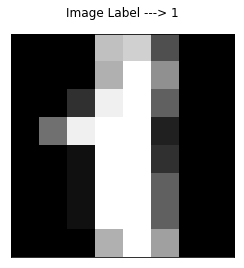

In [70]:
plt.gray()
plt.matshow(mnist['images'][1])
plt.title(f"Image Label ---> {mnist['target'][1]}")
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
X = mnist.data
y = mnist.target

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f'Training Data: {X_train.shape}, Test Data: {X_test.shape}')

Training Data: (1203, 64), Test Data: (594, 64)


In [0]:
norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [81]:
clf = LogisticRegression(C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9326599326599326


(1203, 64)

In [100]:
lvq = LVQ3(n_inputs=X_train.shape[1], step=0.0001, n_classes=len(set(y_train)))
lvq.train(X_train, y_train, epochs=100)
y_pred = lvq.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7542087542087542


In [88]:
glvq = GlvqModel()
glvq.fit(X_train, y_train)
y_pred = glvq.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9158249158249159


In [90]:
gmlvq = GmlvqModel()
gmlvq.fit(X_train, y_train)
y_pred = gmlvq.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9612794612794613
